 <h1><center> Trump Tweets Analysis (2013 - BAN) </center></h1>

<h1><center>Contents Legend</center></h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <center><a> Importing Dependencies and Libraries</a></center>
        <center><a>  Reading the Dataset</a></center>
        <center><a> Pre-processing Dataset </a></center>
        <center><a> Tweet Count by Year</a></center>
        <center><a> Most Tagged Handles</a></center>
        <center><a> Most Tweeted Words</a></center>
        <center><a> Sentiment analysis over time</a></center>
    </ol>
</div>

<h2 id="#Section_1"> Importing Dependencies and Libraries

In [3]:
#Import Required Libraries
import os
from nltk.probability import FreqDist
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from textblob import TextBlob
import re
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

<h2 id="#Section_2"> Reading the Dataset

In [7]:
#Changing Directory to file location
os.chdir('C:/Users/samrat/Desktop/US/Spring 2021/Text Analytics')

#reading dataset into pandas dataframe
df = pd.read_csv('TrumpTweets.csv') 

<h2 id="#Section_3">Pre-processing Dataset

In [11]:
# dropping non-contributing columns
#f = df.drop(['id','device','isRetweet'],axis=1)

#renaming columns to make sense
df=df.rename(columns={'text':'tweet','date':'tweet_time'})

#Exploring dataframe for pre-processing
print('Shape of Dataset:',df.shape)

#printing top 5 rows to have a genereal idea of dataframe
df.head(5)

Shape of Dataset: (56571, 6)


,tweet,isDeleted,favorites,retweets,tweet_time,isFlagged
0,Republicans and Democrats have both created ou...,f,49,255,2011-08-02 18:07:48,f
1,I was thrilled to be back in the Great city of...,f,73748,17404,2020-03-03 01:34:50,f
2,RT @CBS_Herridge: READ: Letter to surveillance...,f,0,7396,2020-01-17 03:22:47,f
3,The Unsolicited Mail In Ballot Scam is a major...,f,80527,23502,2020-09-12 20:10:58,f
4,RT @MZHemingway: Very friendly telling of even...,f,0,9081,2020-01-17 13:13:59,f


### We can see 56571 tweets as of 01/08/2021 input and 6 columns. The columns we will be using for analysis are tweet; isDeleted; favorites; retweets; tweet_time; isFlagged


In [19]:
#Converting Tweet_time to Date time and creading a new column with Tweet_Year
df['tweet_time']=pd.to_datetime(df['tweet_time'])
df['Tweet_Year']=df['tweet_time'].dt.year
df.head(5)

,tweet,isDeleted,favorites,retweets,tweet_time,isFlagged,Tweet_Year
0,Republicans and Democrats have both created ou...,f,49,255,2011-08-02 18:07:48,f,2011
1,I was thrilled to be back in the Great city of...,f,73748,17404,2020-03-03 01:34:50,f,2020
2,RT @CBS_Herridge: READ: Letter to surveillance...,f,0,7396,2020-01-17 03:22:47,f,2020
3,The Unsolicited Mail In Ballot Scam is a major...,f,80527,23502,2020-09-12 20:10:58,f,2020
4,RT @MZHemingway: Very friendly telling of even...,f,0,9081,2020-01-17 13:13:59,f,2020


In [27]:
#dropping tweets before 2013
df = df[df.Tweet_Year >= 2013]
df['Tweet_Year'].unique()

array([2020, 2021, 2019, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

<h2 id="#Section_4"> Tweet Count by Year

In [21]:
#This Function will Plot a bar chart to show the tweet counts over years Starting 2015
def Tweet_Count_by_year():
    Tweet_Count_by_year=pd.DataFrame(df.groupby(df['Tweet_Year'])['tweet'].count().reset_index(name='Tweet_count'))
    ax = sns.barplot(x=Tweet_Count_by_year['Tweet_Year'], y=Tweet_Count_by_year['Tweet_count'])
    ax.set_title('Donald Trump Tweet Counts by Year')

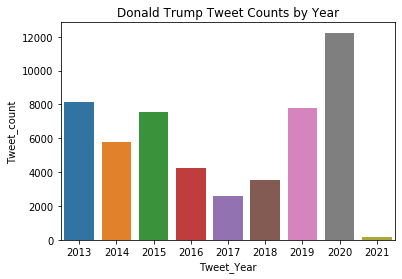

In [22]:
#Calling Function
Tweet_Count_by_year()

### Significant amout of tweets in 2015 (pre-election fever), we can see decrease in tweet count from 2015 to 2017 and increased from 2018 to 2020. The first year of his presidency has tweet count which is less than half the initial number of tweets, however there was steady increase in tweets after becoming president in 2017 till 2020 ,with more than 12000 tweets in 2020(nearly six times the amount of the least tweets in 2017)

<h2 id="#Section_5"> Most Tagged Handles

In [25]:
## defined functions for ease of calling multiple time by year
## moduled into various functions to be handy in future 

# Tweet_Corpus_by_year returns list of words in corpus after some data cleansing
def Tweet_Corpus_by_year(year):
    df_by_Year=df[df['Tweet_Year']==year]
    #reading every tweet from the dataframe and appending it to a tweet_string
    Tweet_Corpus_by_year =''
    for i in df_by_Year.index:
        Tweet_Corpus_by_year = Tweet_Corpus_by_year + ' ' + df_by_Year.loc[i, 'tweet']
    #strip leading and trailing spaces
    Tweet_Corpus_by_year=Tweet_Corpus_by_year.strip().lower()
    #removing hyperlinks and hastags
    Tweet_Corpus_by_year = re.sub(r'http\S+', ' ', Tweet_Corpus_by_year)
    Tweet_Corpus_by_year = re.sub(r'#\S+', ' ', Tweet_Corpus_by_year)
    #split sentences 
    Tweet_Corpus_words=Tweet_Corpus_by_year.split()
    return Tweet_Corpus_words

# Tweet_handles_by_year return dictionary of handles as key and their count as value 
def Tweet_handles_by_year(year):
    Tweet_words=Tweet_Corpus_by_year(year)
    Tweet_handles = []
    for w in Tweet_words:
        if re.search(r'^@\w+', w):
            Tweet_handles.append(w)
    #Some tweets contain '@handle,22-3-2019' etc.. we need to remove string after , 
    Tweet_handles = [h.split(',', 1)[0] for h in Tweet_handles]
    #removing tweets handles ending with other punctuations as well
    Tweet_handles = [re.sub(r'[:!?\.]+', '', h) for h in Tweet_handles]
    handles_dict=FreqDist(Tweet_handles)
    #removing @realdonaldtrump account because its a tagged handle in all the retweet mentions
    del handles_dict['@realdonaldtrump'] 
    #handles_dict.remove['@realdonaldtrump']
    return handles_dict

# Top_20_Tweet_handles_by_year returns top 20 values and handles
def Top_20_Tweet_handles_by_year(year):
    handles_dict=Tweet_handles_by_year(year)
    handles_freq = []
    for key, value in handles_dict.items():
        handles_freq.append((value, key))
    handles_freq.sort(reverse=True)
    top20_handles = handles_freq[0:20]
    values, handlenames = zip(*top20_handles)
    return values,handlenames

# Tweet_Plot_by_year return plot for a particular year
def Tweet_Plot_by_year(year):
    values,handlenames =Top_20_Tweet_handles_by_year(year)
    plt.bar(handlenames, values)
    plt.xlabel('Twitter Handles')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.title('Barplot of Top 20 Twitter Handles Mentioned by Donald Trump')
    return plt.show() 

# Twitter_plot_over_years returns plots over years in the dataframe
def Tweet_Plot_over_years():
    #adding years to a list by looking for unique tweet years columns
    Tweet_Years=df['Tweet_Year'].unique()
    sorted(Tweet_Years)
    for i in Tweet_Years:
        print("Year:", i)
        Tweet_Plot_by_year(i)        

Year: 2020


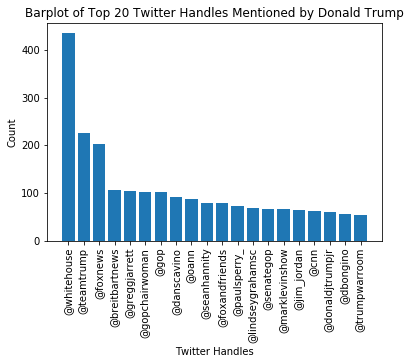

Year: 2021


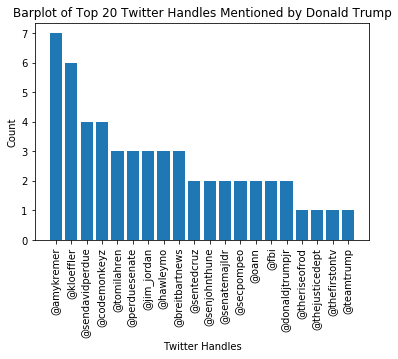

Year: 2019


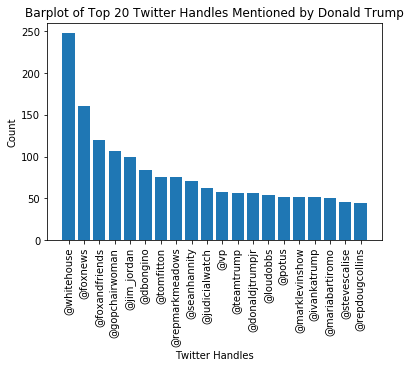

Year: 2013


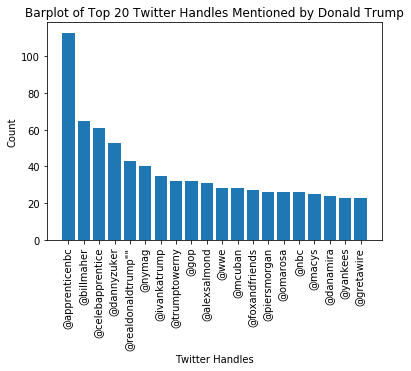

Year: 2014


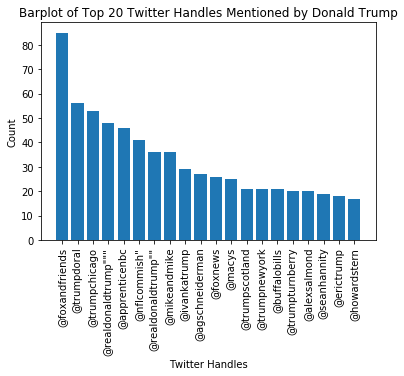

Year: 2015


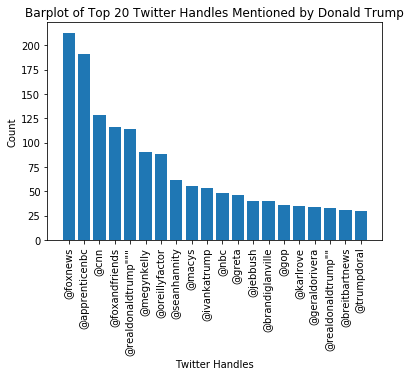

Year: 2016


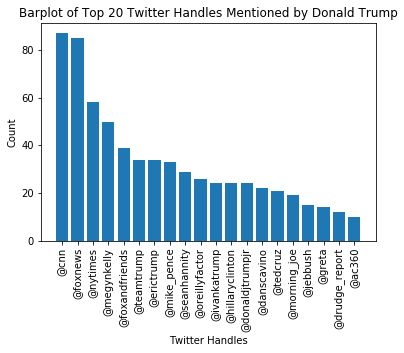

Year: 2017


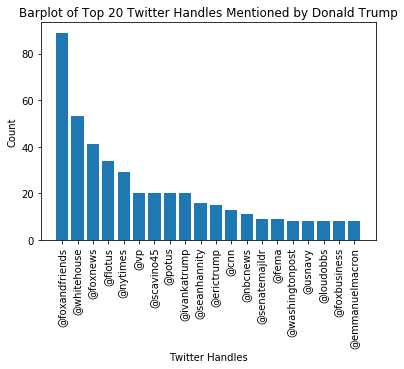

Year: 2018


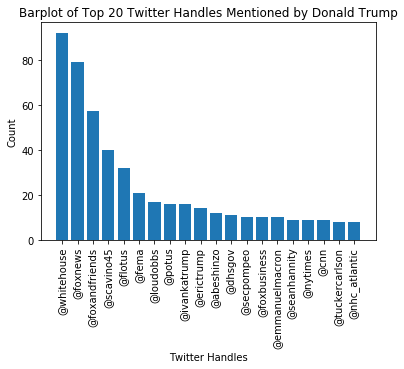

In [26]:
Tweet_Plot_over_years()

### Findings/ Inferences (ignoring 2021 plot due to the volume of tweets)

### 1. Top mentioned  twitter handle @whitehouse (topped over multiple years)
### 2. @foxandfriends and @foxnews are next most used twitter handles, rumored to be pro republic party and supports Trump.
### 3. Most tagged journalist handle before 2016 @meghankelly 
### 4. Most tagged handle before 2016 election @Teamtrump

<h2 id="#Section_6"> Most Tweeted Words

In [28]:
#Tweet_Clean_Corpus_by_year creates corpus, does cleaning and returns a corpus_by year
def Tweet_Clean_Corpus_by_year(year):
    df_by_Year=df[df['Tweet_Year']==year]
    #reading every tweet from dataframe and appending it to a tweet_string
    Tweet_Corpus_by_year =''
    for i in df_by_Year.index:
        Tweet_Corpus_by_year = Tweet_Corpus_by_year + ' ' + df_by_Year.loc[i, 'tweet']
    #strip leading and trailing spaces
    Tweet_Corpus_by_year=Tweet_Corpus_by_year.strip().lower()
    #removing hyperlinks, mentioned handles and hashtags
    Tweet_Corpus_by_year = re.sub(r'http\S+', ' ', Tweet_Corpus_by_year)
    Tweet_Corpus_by_year = re.sub(r'#\S+', ' ', Tweet_Corpus_by_year)
    Tweet_Corpus_by_year = re.sub(r'@\S+', ' ', Tweet_Corpus_by_year)
    #removing numeric values, special characters 
    Tweet_Corpus_by_year = re.sub(r'[^a-z]+', ' ', Tweet_Corpus_by_year)
    Tweet_Corpus_by_year = re.sub(r'\s\w\s', ' ', Tweet_Corpus_by_year)
    #removing some other words - like rt for retweet and amp for '&amp'  
    Tweet_Corpus_by_year = re.sub(r'rt', ' ', Tweet_Corpus_by_year)
    Tweet_Corpus_by_year = re.sub(r'amp', ' ', Tweet_Corpus_by_year)
    return Tweet_Corpus_by_year

# Frequent_Tweet_Words creates dictionary of words, counts word frquency from corpus and returns the dictionary 
def Frequent_Tweet_Words(year):
    Tweet_words = re.split(r'\W+', Tweet_Clean_Corpus_by_year(year))
    stop_words = nltk.corpus.stopwords.words('english')
    #removing words from stop words
    Tweet_words = [w for w in Tweet_words if w not in stop_words]
    #removing short words of lenghth 1 from word list 
    Tweet_words = [w for w in Tweet_words if len(w) > 1 ]
    Tweet_words_dict = nltk.FreqDist(Tweet_words)
    return Tweet_words_dict

#Top_20_Tweet_Words_by_year returns top20 words from the total words
def Top_20_Tweet_Words_by_year(year):
    Tweet_words_dict=Frequent_Tweet_Words(year)
    Tweet_words_freq = []
    for key, value in Tweet_words_dict.items():
        Tweet_words_freq.append((value, key))
    Tweet_words_freq.sort(reverse=True)
    top20_handles = Tweet_words_freq[0:20]
    values, Words = zip(*top20_handles)
    return values, Words

#Tweet_word_Plot_by_year returns the plot of top20 words in the tweet corpus
def Tweet_word_Plot_by_year(year):
    values, Words = Top_20_Tweet_Words_by_year(year)
    plt.bar(Words, values)
    plt.xlabel('Twitter Words')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.title('Barplot of Top 20 Twitter Frequent Words used by Donald Trump')
    return plt.show()

# Tweet_word_Plot_over_years creates word plots over years
def Tweet_word_Plot_over_years():
    #adding years to a list by looking for unique tweet years columns
    Tweet_Years=df['Tweet_Year'].unique()
    sorted(Tweet_Years)
    for i in Tweet_Years:
        print("Year:", i)
        Tweet_word_Plot_by_year(i)

Year: 2020


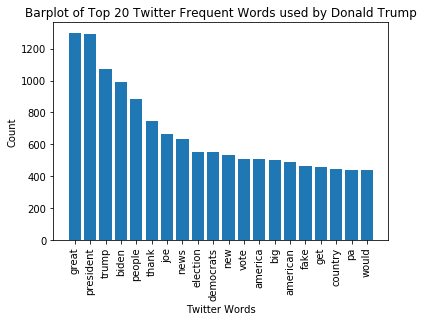

Year: 2021


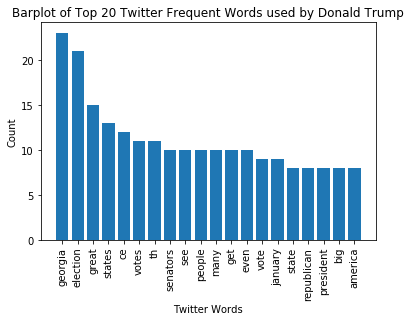

Year: 2019


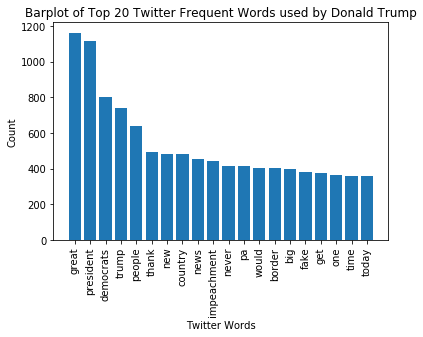

Year: 2013


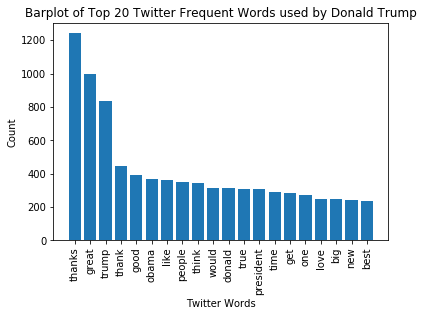

Year: 2014


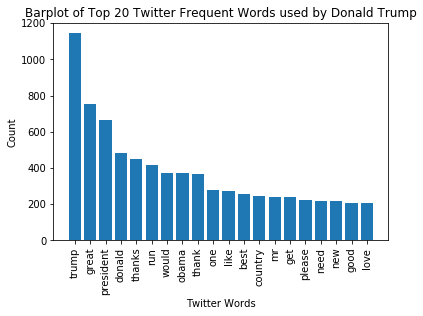

Year: 2015


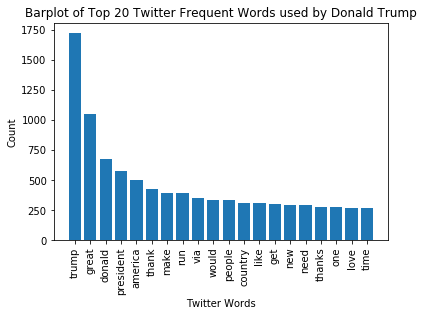

Year: 2016


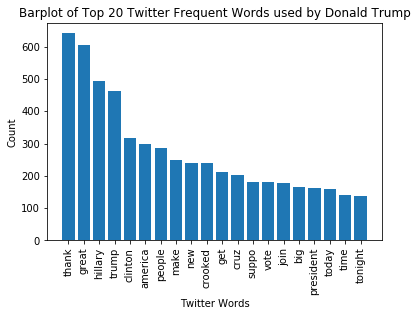

Year: 2017


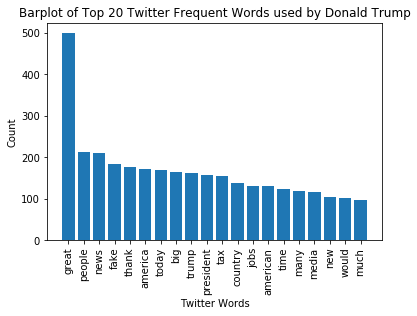

Year: 2018


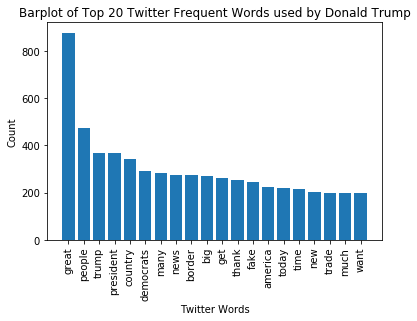

In [29]:
#calling the function
Tweet_word_Plot_over_years()

### Findings/ Inferences (ignoring 2021 plot due to the volume of tweets)
### 1. Special mention must be made about year 2015, where Trump tweeted about himself more than anything else in any year, about 1700 tweets to his name
### 2. Quite understandably Hillary is one of the most tweeted word during 2016 elections and biden in 2020.
### 3. great, trump, people, president, america, make are some of the frequent used words almost every year. MAGA- Make america great again/Trump again is the core of campaign, so this explains
### 5. Not so long ago, we remember Trump tweeting alot aganist media, he called most news channels, some in particular as fake/sold media. Evedently, most frequently used words include these words. 

<h2 id="#Section_7"> Sentiment analysis over time

In [30]:
# Tweet_List_by_year creates a list of tweets and a seperate dataframe for each year and returns them
def Tweet_List_by_year(year):
    tweetlist= []
    df_by_Year=df[df['Tweet_Year']==year]
    for i in df_by_Year.index:
        tweetlist.append(df_by_Year.loc[i, 'tweet']) 
    return tweetlist,df_by_Year

# Tweet_Sentiment_by_year_nltk extracts polarity from each tweet using NLTK's SentimentIntensityAnalyzer
def Tweet_Sentiment_by_year_nltk(year):
    tweetlist,df_by_Year = Tweet_List_by_year(year)
    analyzer = SentimentIntensityAnalyzer()
    sentiment = {}
    polarity = [0]*len(tweetlist)

    for i, tweet in enumerate(tweetlist):
        tweet = tweet.strip(punctuation).lower()
        tweet = re.sub(r'http\S+', ' ', tweet)
        tweet = re.sub(r'@\S+', ' ', tweet)
        tweet = re.sub(r'#', '', tweet)
        sentiment[i] = analyzer.polarity_scores(tweet)
        polarity[i] = sentiment[i]['compound']
    
    df_by_Year['polarity'] = polarity
    df_by_Year['polarity'].describe()

    df_by_Year['polarity'].hist(bins=20)
    plt.title('Sentiment Histogram')
    plt.xlabel('Sentiment Polarity')
    return plt.show()

def Tweet_Sentiment_by_years_text_blob(year):
    tweetlist,df_by_Year = Tweet_List_by_year(year)
    polarity = [0]*len(tweetlist)

    for i, tweet in enumerate(tweetlist):
        tweet = tweet.strip(punctuation).lower()
        tweet = re.sub(r'http\S+', ' ', tweet)
        tweet = re.sub(r'@\S+', ' ', tweet)
        tweet = re.sub(r'#', '', tweet)
        polarity[i] = TextBlob(tweet, analyzer=NaiveBayesAnalyzer()).polarity
    
    df_by_Year['polarity'] = polarity
    df_by_Year['polarity'].describe()

    df_by_Year['polarity'].hist(bins=20)
    plt.title('Sentiment Histogram')
    plt.xlabel('Sentiment Polarity')
    return plt.show()

# Tweet_Sentiment_Plot_over_years returns tweet polarity over the years
def Tweet_Sentiment_Plot_over_years():
    #adding years to a list by looking for unique tweet years columns
    Tweet_Years=df['Tweet_Year'].unique()
    sorted(Tweet_Years)
    #Iterating over years to get all plots at once
    for i in Tweet_Years:
        print("Year:", i)
        Tweet_Sentiment_by_year_nltk(i)

Year: 2020


C:\Users\samrat\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


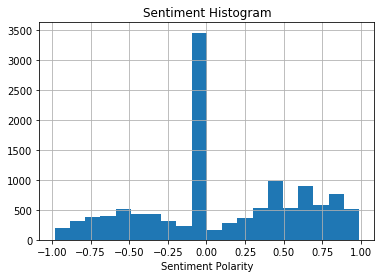

Year: 2021


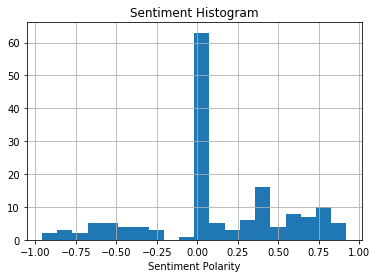

Year: 2019


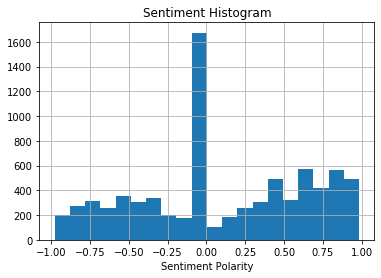

Year: 2013


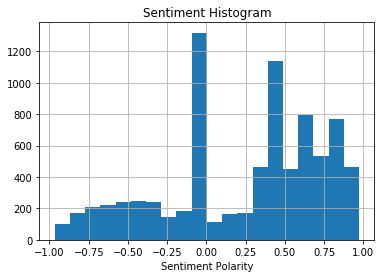

Year: 2014


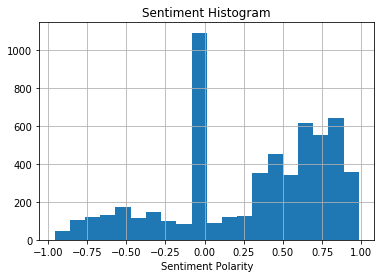

Year: 2015


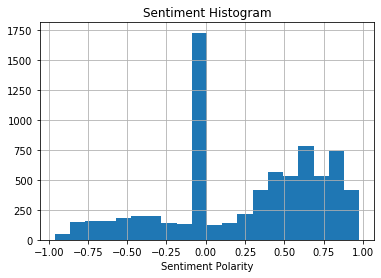

Year: 2016


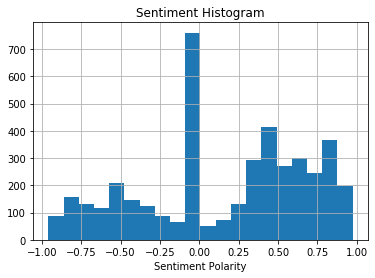

Year: 2017


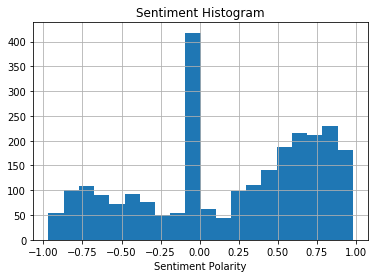

Year: 2018


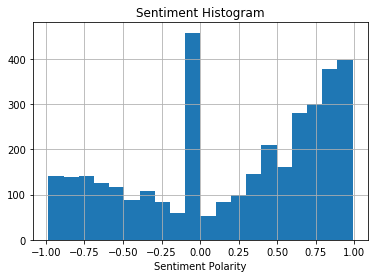

In [32]:
#calling the function
Tweet_Sentiment_Plot_over_years()

### Findings/Inferences (ignoring 2021 plot due to the volume of tweets)

### Looking at the above plots, we can infer most Tweets of Trump are neutral every single over the years. Although there has been a steady increase the ratio of negative tweets vs positive tweets proportion over the years 2013 to 2020(visible from the area of graphs), Nuetral tweets topped in every single year.

<h2 id="#Section_7"> Thank You